Breast Cancer Classification with a simple neural network (NN)

## Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

## Data Preprocessing

In [ ]:
bc_df = sklearn.datasets.load_breast_cancer() #loading the dataset; its in the form of a dictionary

In [ ]:
df = pd.DataFrame(bc_df.data, columns = bc_df.feature_names) #converting it to a proper dataframe

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#adding the target variable to the df
df['label'] = bc_df.target

In [ ]:
df.info() #no missing values so far

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe() #descriptive statistics of the dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
#calculate distribution of the target variable
df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

Imbalance in the data (but not significant). We have to perform methods such as sampling, to bring distributions at an even level(for other situations).<br>
 1 -> Benign, 0 -> Malignant. 

## Split data into features and targets

In [ ]:
X = df.drop(columns = ['label'], axis = 1) #features
y = df['label'] #target

#### Splitting features and target into train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

## Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

#Standardization is the subtraction of the mean and then dividing by its standard deviation. 
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [ ]:
#import tensorflow and keras for working with neural networks
import tensorflow as tf
from tensorflow import keras

In [ ]:
#setting up the layers of a neural network  (input, hidden and output layer)
model = keras.Sequential([ 
    #30 is the number of features in the X_train, which indicated also the number of neurons created
    keras.layers.Flatten(input_shape = (30, )),#input layer (each feature gets represented by a single neuron, the features get flattened into a one dimensional vector)
    #relu is the most used activation function for hidden layers
    keras.layers.Dense(20, activation = 'relu'), #hidden layer (dense means all neurons at that layer are connected with the neurons of the previous layer)
    #either 0 or 1 so 2 neurons (logistic regression function)
    keras.layers.Dense(2, activation = 'sigmoid') #output layer
])

In [ ]:
#compiling neural network
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy", #in case of simply integer values target
              metrics = ["accuracy"])

In [ ]:
#training neural network
history = model.fit(X_train_std, y_train, validation_split = 0.1, epochs = 15) #how many times model has to go through the data (epochs)

Epoch 1/15
13/13 [==============================] - 1s 19ms/step - loss: 0.9080 - accuracy: 0.4108 - val_loss: 0.8039 - val_accuracy: 0.5000
Epoch 2/15
13/13 [==============================] - 0s 7ms/step - loss: 0.6053 - accuracy: 0.6895 - val_loss: 0.5369 - val_accuracy: 0.6957
Epoch 3/15
13/13 [==============================] - 0s 4ms/step - loss: 0.4295 - accuracy: 0.8313 - val_loss: 0.3918 - val_accuracy: 0.7826
Epoch 4/15
13/13 [==============================] - 0s 5ms/step - loss: 0.3287 - accuracy: 0.8753 - val_loss: 0.3112 - val_accuracy: 0.8478
Epoch 5/15
13/13 [==============================] - 0s 5ms/step - loss: 0.2687 - accuracy: 0.8949 - val_loss: 0.2617 - val_accuracy: 0.8913
Epoch 6/15
13/13 [==============================] - 0s 5ms/step - loss: 0.2291 - accuracy: 0.9095 - val_loss: 0.2302 - val_accuracy: 0.9130
Epoch 7/15
13/13 [==============================] - 0s 5ms/step - loss: 0.2010 - accuracy: 0.9291 - val_loss: 0.2097 - val_accuracy: 0.9130
Epoch 8/15
13/13 [=

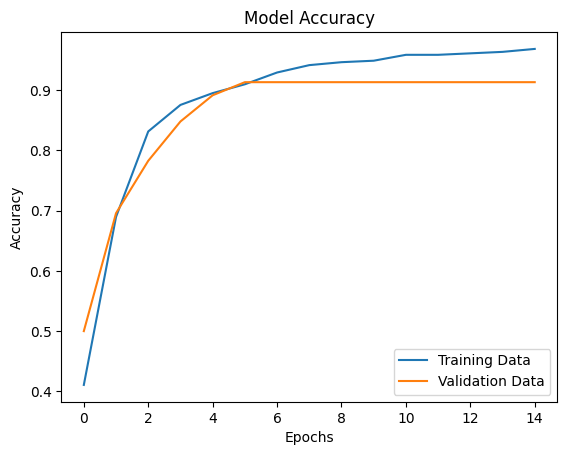

In [ ]:
#Visualizing accuracy and loss () (training accuracy and validation accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')

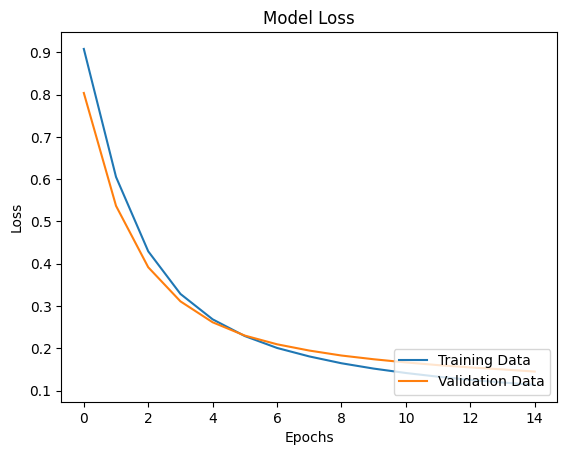

In [ ]:
#loss function (training and validation )
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')

## Accuracy of the model in the test data

In [ ]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print("Accuracy of the test data is ",accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.0835 - accuracy: 0.9737
Accuracy of the test data is  0.9736841917037964


In [ ]:
#making predictions
y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 3ms/step


In [ ]:
y_pred #it will show the probabilities of 0 and 1

array([[3.68220359e-01, 7.88468063e-01],
       [8.71987700e-01, 4.04673629e-02],
       [7.47963011e-01, 1.98777780e-01],
       [3.69778067e-01, 9.52636659e-01],
       [3.92163783e-01, 9.93023455e-01],
       [9.98430371e-01, 4.55249473e-03],
       [9.80686903e-01, 3.43878032e-03],
       [6.09984875e-01, 2.81307638e-01],
       [5.16439378e-01, 7.33067691e-01],
       [2.88707227e-01, 9.60366428e-01],
       [3.77559364e-01, 9.55805719e-01],
       [7.19086885e-01, 3.38446975e-01],
       [4.05222595e-01, 9.57241178e-01],
       [5.61155438e-01, 3.05005461e-01],
       [2.38343686e-01, 9.71147776e-01],
       [8.09386671e-01, 1.96817085e-01],
       [4.17324454e-01, 9.80889976e-01],
       [3.63477319e-01, 9.96695101e-01],
       [2.25445271e-01, 9.97382820e-01],
       [9.49006557e-01, 3.06361243e-02],
       [4.47945833e-01, 6.29058957e-01],
       [4.07191515e-01, 9.43009496e-01],
       [9.90812540e-01, 8.64135008e-03],
       [1.27819225e-01, 9.91174877e-01],
       [3.432211

In [ ]:
 #converting class probabilities to labels by taking indices with help of np.argmax

 argmax_list = np.array([np.argmax(i) for i in y_pred])
 argmax_list.T

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
#Building the predictive system for a sample case (single supposed row of the dataframe)
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

if np.argmax(prediction) == 1:
  print("Tumor is benign")
else:
  print("Tumor is malignant")




1/1 [==============================] - 0s 37ms/step
[[0.2509045 0.9608958]]
Tumor is benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
